In [1]:
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd
import time
from numba import jit
from numba.typed import List
a = sys.path.append('../modules/')
import plot_3D, auxiliars, salve_doc, sphere, sample_random, Operators_array, aux_operators_array, graphs_and_dist

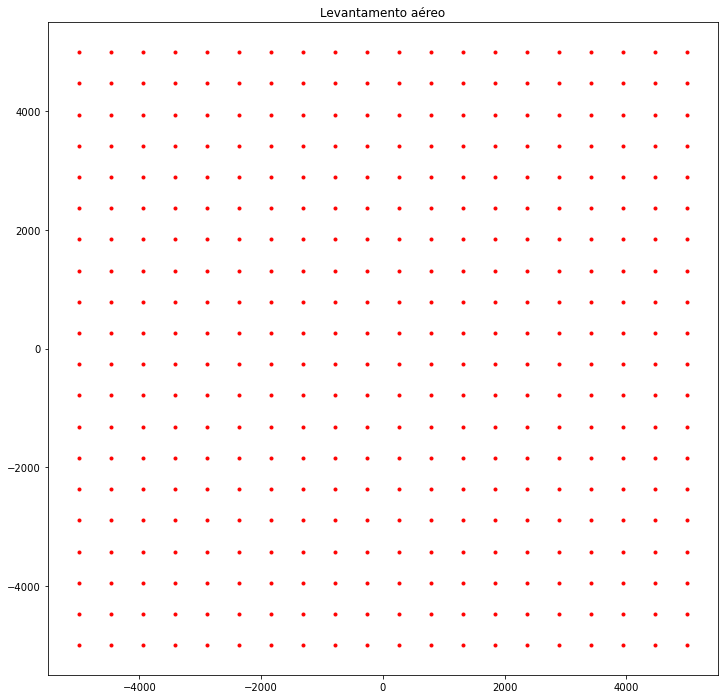

In [2]:
acquisition = {'nx': 20,
                  'ny': 20,
                  'xmin': -5000,
                  'xmax': 5000,
                  'ymin': -5000,
                  'ymax': 5000,
                  'z': -50.0,
                  'color': '.r'}


x, y, X, Y, Z = plot_3D.create_aquisicao(**acquisition)

data_cubo = pd.read_table('Logfile/28_01_2021_16_20/data_mag.cvs', sep =',')
anomaly_cubo = np.reshape(np.array(data_cubo['Anomalia Magnética(nT)']), (20,20))


In [3]:
population = {'xmax': 5000.0,
                'xmin': -5000.0,
                'ymax': 5000.0,
                'ymin': -5000.0,
                'zlim': 7000.0,
                'z_min': 0.0,
                'n_dip': 12,
                'n_pop': 50,
                'inclmax': 5.0,
                'inclmin': -5.0,
                'declmax': 5.0,
                'declmin': -5.0,
                'mmax': 100000000000,
                'mmin': 10000000,
                'homogeneo': True
                }

I, D = 5.0, 70.0
momento = 38000000000

filhos_mut = {'xmax': 5000.0,
                'xmin': -5000.0,
                'ymax': 5000.0,
                'ymin': -5000.0,
                'zlim': 7000.0,
                'z_min': 0.0,
                'n': 1,
                'inclmax': 5.0,
                'inclmin': -5.0,
                'declmax': 5.0,
                'declmin': -5.0,
                'magmax': 100000000000,
                'magmin': 1000000000,
                'homogeneo': True
                }

In [4]:
populacao = Operators_array.create_population(**population)
populacao = List(populacao)
#print(populacao)
print(populacao[0])

[[-1.77388428e+03  3.23996750e+02  2.57700894e+03]
 [-8.35370917e+02 -6.56584272e+02  9.26617948e+02]
 [ 2.45418045e+03  4.64290145e+03  1.53335545e+03]
 [-2.35467927e+03  8.90544117e+02  4.44321879e+03]
 [ 2.13539292e+02 -4.53793737e+03  6.03827554e+03]
 [-8.34928485e+01 -4.48885965e+03  3.56127756e+02]
 [-1.44387409e+03 -1.72491770e+03  3.29445898e+03]
 [-4.50138723e+03  1.00228306e+03  2.22361375e+03]
 [-3.61799136e+03 -5.27423372e+02  2.71476812e+03]
 [-1.53909863e+03 -5.85500202e+02  2.19307500e+03]
 [ 1.29442497e+03 -1.17881493e+03  3.27688825e+03]
 [ 1.29652899e+03  2.79164577e+03  6.39043952e+03]
 [ 3.29506735e+00 -2.45375077e-01  4.34644879e+09]]


In [5]:
fit_, anomaly = Operators_array.fit_value(X, Y, Z, I, D, populacao, anomaly_cubo)
print(fit_)

[87.25442291835273, 38.08371069769377, 19.452902068543462, 33.10972792649621, 18.839015402119667, 26.915252198019118, 22798.97662654964, 18.653643445796643, 1847.9563519840328, 7313.501888859386, 78.67664429641532, 20.46291426754076, 19.39983207460496, 2823.267908118668, 20.514570220991303, 29.173672945743277, 1020.3619915130951, 619566.8051229172, 1470.7358686953373, 49.90051374941146, 20.795055899800182, 12855.08405523431, 191.74879884789976, 42.39004453442717, 43510.88249743219, 31.264431734697922, 2339.4529959934393, 5636.318358462706, 5417.482875967415, 1501.552215940353, 2187.839237514181, 22.757502767771285, 725.805850220905, 18937.747061434653, 428.2794053657446, 161.75799060166847, 24.924476213360695, 15.361042239198957, 965.8288413555993, 37.249924992690396, 21.533347159879803, 56.87117033388871, 348.7474602774982, 20.248971363375954, 21.27545368092481, 498.1503281385364, 24.57880299045963, 159.98026684113577, 11133.451173601963, 86.3623046083138]


In [6]:
print(populacao[0][12,0])

3.295067348970183


In [7]:
pop_fit = []
for i in range(len(populacao)):
    pop_fit_junta = [populacao[i], fit_[i]]
    pop_fit.append(pop_fit_junta)

print(pop_fit[0][1], pop_fit[1][1])

87.25442291835273 38.08371069769377


In [25]:

fit_s = sorted(pop_fit, key = pop_fit[:][1])
#print(fit_s)
#i_fit = fit_.index(fit_s)

TypeError: 'list' object is not callable

In [9]:
v_teste = [45, 6, 70, 4, 80, 7, 12, 45, 9, 52]

In [10]:
n_div = 5
n_len = int(len(populacao)/n_div)
print(n_len)
# [i*2, n_len*(i+1)]
v_div = v_teste[0:n_len]
v_div1 = v_teste[2:4]
v_div2 = v_teste[4:6]
v_div3 = v_teste[6:8]
v_div4 = v_teste[8:10]
print(v_div)
print(v_div1)
print(v_div2)
print(v_div3)
print(v_div4)

10
[45, 6, 70, 4, 80, 7, 12, 45, 9, 52]
[70, 4]
[80, 7]
[12, 45]
[9, 52]


In [11]:
k = 20
v_regiao_pop = []
for i in range(5):
    v_pega_pop = populacao[(i*n_len):(n_len*(i+1))]
    #v_pega_fit = fit_[]
    v_regiao_pop.append(v_pega_pop)
#print(len(v_segura[0]))

In [12]:
n_pop = populacao.copy()
o = len(n_pop)
pop_ord = [None]*o
fit_ord = [None]*o
fit_1 = np.array(fit_)
print(pop_ord)
#n_fica = 30
#n_fica = int(len(pop) - (len(filhos)-(0.2*len(pop)))) Colocar o if!!!
#print('N fica é =', n_fica)
df = pd.DataFrame(fit_1)
x = df.sort_values(0, ascending=True) #Ordenar os valores de acordo com o menor fit.
y = x.index[0:len(x)]
for index, pos in enumerate(y): #Substituir os piores indivíduos pelos filhos
    pop_ord[index] = n_pop[pos]
    fit_ord[index] = fit_[pos]



[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [13]:
#x

In [14]:
#print(fit_ord)

In [15]:
#print(y)
#print(type(y))

In [16]:
#pop_ord

In [17]:
#pop_ord[0]
#print(len(pop_ord))

In [18]:
#populacao[37]

In [19]:
def tournament_selection_ranking_diversit(populacao, fit_, n_regiao= 5):
    n_pop = populacao.copy()
    pais_ = []
    n_len = int(len(populacao)/n_regiao)
    k = 20
    v_regiao_pop = []
    v_regiao_fit = []
    pop_ord = [None]*len(n_pop)
    fit_ord = [None]*len(n_pop)
    # Ordenando os valores da população e do phi
    df = pd.DataFrame(fit_)
    x = df.sort_values(0, ascending=True) #Ordenar os valores de acordo com o menor fit.
    y = x.index[0:len(x)]
    for index, pos in enumerate(y):
        pop_ord[index] = n_pop[pos]
        fit_ord[index] = fit_[pos]
    #Dividindo as regiões
    for i in range(n_regiao):
        v_pega_pop = pop_ord[(i*n_len):(n_len*(i+1))]
        v_pega_fit = fit_ord[(i*n_len):(n_len*(i+1))]
        v_regiao_pop.append(v_pega_pop)
        v_regiao_fit.append(v_pega_fit)
    #Escolhendo os pais via torneios
        aprovados, escolhidos = Operators_array.tournament_selection(v_regiao_pop[i], v_regiao_fit[i])
        pais_.extend(aprovados)
    
    return pais_


In [20]:
#papai = tournament_selection_ranking_diversit(populacao, fit_, n_regiao= 5)

# Grafos

In [21]:
theta, mst = graphs_and_dist.theta_value(populacao)

In [22]:
%timeit graphs_and_dist.theta_value(populacao)

57.9 ms ± 2.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
%timeit Operators_array.fit_value(X, Y, Z, I, D, populacao, anomaly_cubo)

41.6 ms ± 3.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
%timeit Operators_array.tournament_selection(populacao, fit_, p_pop = 0.5, n_pai = 0.4)

1.74 ms ± 34.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
